1_9305140_10746927
{'W': {'W1': array([[-2.78068170e-16, -8.83229639e-17,  8.04723126e-17, ...,
        -1.48150708e-03,  3.42381557e-02, -3.97974353e-02],
       [-2.17247262e-03, -3.30417953e-02, -3.55711091e-02, ...,
        -3.81422797e-02, -1.78528728e-02, -7.12466448e-02],
       [ 1.98088284e-02, -1.06932659e-02, -6.24325947e-02, ...,
        -8.48380689e-03, -3.17994450e-02,  4.34176300e-02],
       ...,
       [ 1.09062265e-02, -2.12297241e-02,  4.36885687e-02, ...,
         7.81364764e-01,  1.54719544e-03,  5.01690824e-03],
       [ 3.63964543e-02,  1.21518301e-02, -5.33102161e-02, ...,
         3.99706307e-02,  7.11397263e-01, -2.52424609e-02],
       [-4.05717652e-02, -5.53834438e-02,  1.62728274e-02, ...,
        -9.77780063e-03, -2.25788777e-02,  8.18000785e-01]]), 'W2': array([[ 0.77963519, -0.1153491 , -0.52725526,  0.03493524, -0.25666576,
        -0.18375977],
       [-0.05057464, -0.16336382,  0.37673522, -0.5116579 , -0.57946668,
        -0.48088419],
       [ 0.376

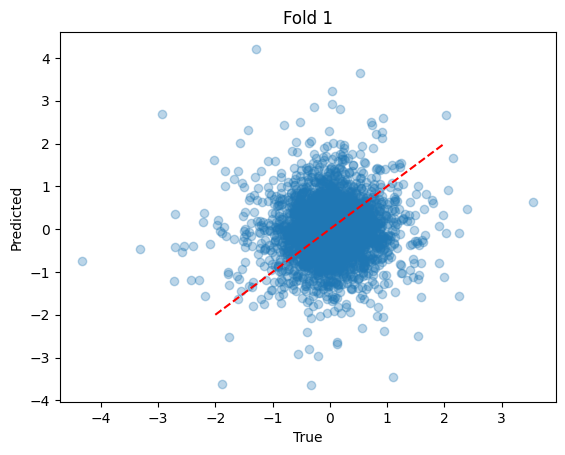

In [3]:
import json
import numpy as np
import pandas as pd
from utils import run_tensor_regression
from utils import run_tensor_regression_cv
import matplotlib.pyplot as plt

json_path = "/projects/YangLabData/Ruilong/APE_project/valid_region_gene_map.json"
with open(json_path, 'r') as f:
        genelist = json.load(f)
region_id = list(genelist.keys())[6]
print(region_id)

result = run_tensor_regression(region_id)
print(result)
print(result["C_ts"].min())
print(result["C_ts"].max())

r2s, y_trues, y_preds = run_tensor_regression_cv(region_id)
for i, (r2, y_true, y_pred) in enumerate(zip(r2s, y_trues, y_preds)):
    print(f"Fold {i+1}: R² = {r2:.4f}, True range = ({y_true.min():.3f}, {y_true.max():.3f}), Pred range = ({y_pred.min():.3e}, {y_pred.max():.3e})")
print(y_true)

plt.scatter(y_trues[0], y_preds[0], alpha=0.3)
plt.plot([-2, 2], [-2, 2], 'r--')
plt.xlabel("True"); plt.ylabel("Predicted"); plt.title("Fold 1")
plt.show()


In [24]:
import json
import numpy as np
import pandas as pd
from utils import run_tensor_regression_cv

# 加载 JSON
json_path = "/projects/YangLabData/Ruilong/APE_project/valid_region_gene_map.json"
with open(json_path, 'r') as f:
    genelist = json.load(f)

# 保存结果
results = []

for region_id in list(genelist.keys()):
    try:
        r2s, _, _ = run_tensor_regression_cv(region_id)
        avg_r2 = np.mean(r2s)
        results.append((region_id, avg_r2))
    except Exception as e:
        print(f"❌ {region_id} 出错：{e}")
        continue

# 按 R² 值排序
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
top5 = results_sorted[:5]

# 显示前 5 个
df_top5 = pd.DataFrame(top5, columns=["Region", "Average_R2"])
print("\n📈 Top 5 Regions by Average R²:")
print(df_top5)



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_1961168_3666172 出错：Design matrix invalid: 415 samples < 805 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_7187275_9305140 出错：Design matrix invalid: 415 samples < 440 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_12719464_14565015 出错：Design matrix invalid: 415 samples < 1244 covariates.
❌ 1_14565015_16571235 出错：Design matrix invalid: 415 samples < 1230 covariates.
❌ 1_16571235_18336405 出错：Design matrix invalid: 415 samples < 1844 covariates.
❌ 1_18336405_20142656 出错：Design matrix invalid: 415 samples < 442 covariates.

🔄 Fold 

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=342, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 1_118296444_148907004 出错：Design matrix invalid: 415 samples < 8563 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_159943258_162376931 出错：Design matrix invalid: 415 samples < 534 covariates.
❌ 1_162376931_165222465 出错：Design matrix invalid: 415 samples < 513 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_204711940_206268085 出错：Design matrix invalid: 415 samples < 441 covariates.
❌ 1_206268085_208237

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=382, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=382, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=382, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=382, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=382, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 1_216070292_218532171 出错：Design matrix invalid: 415 samples < 424 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 1_245343444_247181216 出错：Design matrix invalid: 415 samples < 425 covariates.
❌ 1_247181216_248945267 出错：Design matrix invalid: 415 samples < 439 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 2_1777250_3926189 出错：Design matrix invalid: 415 samples < 492 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=413, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=413, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=413, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=413, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=413, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 2_94660727_98378738 出错：Design matrix invalid: 415 samples < 1200 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fol

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 2_109814855_113164279 出错：Design matrix invalid: 415 samples < 825 covariates.
❌ 2_113164279_116014894 出错：Design matrix invalid: 415 samples < 762 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 2_129900512_132285211 出错：Design matrix invalid: 415 samples < 2663 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 2_141761033_143761915 出错：Design matrix invalid: 415 samples < 498 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 2_184415446_189017339 出错：Design matrix invalid: 415 samples < 438 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 2_201953914_204934518 出错：Design matrix invalid: 415 samples < 434 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 3_18479_1400095 出错：Design matrix invalid: 415 samples < 438 covariates.
❌ 3_1400095_2950436 出错：Design matrix invalid: 415 samples < 519 covariates.
❌ 3_2950436_4389963 出错：Design matrix invalid: 415 samples < 596 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=33


🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 3_20049856_21602215 出错：Design matrix invalid: 415 samples < 490 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 3_58171792_60287177 出错：Design matrix invalid: 415 samples < 603 covariates.
❌ 3_60287177_62369991 出错：Design matrix invalid: 415 samples < 525 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 3_75655798_77459684 出错：Design matrix invalid: 415 samples < 1514 covariates.
❌ 3_77459684_78975391 出错：Design matrix invalid: 415 samples < 694 covariates.

🔄 Fold 1/5.

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=349, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=33


🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 3_195065945_196244537 出错：Design matrix invalid: 415 samples < 980 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_2841252_3844313 出错：Design matrix invalid: 415 samples < 501 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_5500661_6771316 出错：Design matrix invalid: 415 samples < 416 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_48121583_53011266 出错：Design matrix invalid: 415 samples < 4742 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_67989047_70183435 出错：Design matrix invalid: 415 samples < 450 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_90639526_93312148 出错：Design matrix invalid: 415 samples < 448 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_110335411_112948946 出错：Design matrix invalid: 415 samples < 423 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 4_116355773_117558763 出错：[Errno 2] No such file or directory: '/projects/YangLabData/Ruilong/APE_project/plink_result//4_116355773_117558763/4_116355773_117558763_final.raw'

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=402, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=402, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=402, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=402, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=402, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 5_19917607_22151964 出错：Design matrix invalid: 415 samples < 676 covariates.

🔄 Fold 1/5...

🔄 Fold

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=380, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=380, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=380, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=380, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=380, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 5_176023592_177824506 出错：Design matrix invalid: 415 samples < 507 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fo

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 6_157797687_160159465 出错：Design matrix invalid: 415 samples < 446 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=355, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 7_20085285_22468010 出错：Design matrix invalid: 415 samples < 458 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=387, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=387, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=387, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=387, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=387, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 7_28320690_31097675 出错：Design matrix invalid: 415 samples < 482 covariates.
❌ 7_31097675_33516156 出错：Design matrix invalid: 415 samples < 472 covariates.
❌ 7_33516156_36173929 出错：Design matrix invalid: 415 samples < 479 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...



/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=406, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 7_73920272_76829247 出错：Design matrix invalid: 415 samples < 568 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=390, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 7_88195689_91032469 出错：Design matrix invalid: 415 samples < 443 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 7_101555972_103557063 出错：Design matrix invalid: 415 samples < 803 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=341, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=341, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=341, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=341, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=341, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 7_142959223_145271196 出错：Design matrix invalid: 415 samples < 453 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=33


🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=33

❌ 7_148118226_150143569 出错：Design matrix invalid: 415 samples < 584 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 7_151014417_152552721 出错：Design matrix invalid: 415 samples < 1065 covariates.
❌ 7_152552721_153976934 出错：Design matrix invalid: 415 samples < 661 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 7_156272556_157841905 出错：Design matrix invalid: 415 samples < 510 covariates.
❌ 7_157841905_159335885 出错：Design matrix invalid: 415 samples < 461 covariates.
❌ 8_60422_1094217 出错：Design matrix invalid: 415 samples < 508 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=33

❌ 8_1213245_2095102 出错：Design matrix invalid: 415 samples < 534 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_2715741_3535404 出错：Design matrix invalid: 415 samples < 842 covariates.
❌ 8_3535404_3925495 出错：Design matrix invalid: 415 samples < 842 covariates.
❌ 8_3925495_4622954 出错：Design matrix invalid: 415 samples < 842 covariates.
❌ 8_4622954_5289405 出错：Design matrix invalid: 415 samples < 842 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_7295557_9297184 出错：Design matrix invalid: 415 samples < 1367 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_11421489_13634266 出错：Design matrix invalid: 415 samples < 1343 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_14087483_1

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_65576855_68950822 出错：Design matrix invalid: 415 samples < 415 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=388, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=388, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=388, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=388, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=388, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=386, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=386, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=386, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=386, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=386, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 8_120189461_123849219 出错：Design matrix invalid: 415 samples < 522 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=33


🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=376, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=376, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=376, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=376, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=376, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 9_7154923_8456299 出错：Design matrix invalid: 415 samples < 848 covariates.
❌ 9_8456299_9166403 出错：Design matrix invalid: 415 samples < 507 covariates.
❌ 9_9166403_10879253 出错：Design matrix invalid: 415 samples < 507 covariates.
❌ 9_12276489_14836365 出错：Design matrix invalid: 415 samples < 446 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 9_16659657_18661053 出错：Design matrix invalid: 415 samples < 435 covariates.
❌ 9_18661053_20463536 出错：Design matrix invalid: 415 samples < 487 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 9_39393282_69897795 出错：Design matrix invalid: 415 samples < 18996 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=351, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=375, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=375, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=375, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=375, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=375, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 10_10207433_12544798 出错：Design matrix invalid: 415 samples < 466 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fol

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=359, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=333, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=333, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=333, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=333, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=333, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 10_19427949_22483354 出错：Design matrix invalid: 415 samples < 496 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=348, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=348, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=348, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=348, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=348, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 10_44234627_46978910 出错：Design matrix invalid: 415 samples < 700 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 10_49632869_51856869 出错：Design matrix invalid: 415 samples < 430 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=343, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=343, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=343, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=343, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=343, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=369, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 10_73662792_76947056 出错：Design matrix invalid: 415 samples < 436 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=363, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 10_79116992_80654923 出错：Design matrix invalid: 415 samples < 429 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 10_96062600_98481545 出错：Design matrix invalid: 415 samples < 416 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 10_98908643_101189482 出错：Design matrix invalid: 415 samples < 433 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...



/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=383, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=383, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=383, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=383, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=383, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=385, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=385, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=385, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=385, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=385, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 10_124109830_126312529 出错：Design matrix invalid: 415 samples < 719 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=364, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 11_70855_1192365 出错：Design matrix invalid: 415 samples < 415 covariates.
❌ 11_1192365_3644251 出错：Design matrix invalid: 415 samples < 684 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=410, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=410, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=410, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=410, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=410, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=399, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 11_17556855_19547988 出错：Design matrix invalid: 415 samples < 453 covariates.
❌ 11_19547988_20995592 出错：Design matrix invalid: 415 samples < 440 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=366, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 11_84670229_86908259 出错：Design matrix invalid: 415 samples < 454 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fol

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=395, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=395, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=395, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=395, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=395, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=339, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 11_131204717_133130151 出错：Design matrix invalid: 415 samples < 449 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=360. Setting n_eigenvecs to 360.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=360. Setting n_eigenvecs to 360.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=360. Setting n_eigenvecs to 360.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=360. Setting n_eigenvecs to 360.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=360. Setting n_eigenvecs to 360.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=408, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=408, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=408, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=408, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=408, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 12_17934939_20711009 出错：Design matrix invalid: 415 samples < 466 covariates.
❌ 12_20711009_23667700 出错：Design matrix invalid: 415 samples < 589 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 12_25218149_27646840 出错：Design matrix invalid: 415 samples < 449 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5..

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=403, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=401, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 12_129893376_131302206 出错：Design matrix invalid: 415 samples < 489 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=400, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=378, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 14_18225607_21121243 出错：Design matrix invalid: 415 samples < 2184 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 14_27997327_29502939 出错：[Errno 2] No such file or directory: '/projects/YangLabData/Ruilong/APE_project/plink_result//14_27997327_29502939/14_27997327_29502939_final.raw'

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 14_31914059_34377045 出错：Design matrix invalid: 415 samples < 509 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5..

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=374, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=374, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=374, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=374, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=374, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=352, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 15_20926275_23949980 出错：Design matrix invalid: 415 samples < 664 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 15_24863443_27052965 出错：Design matrix invalid: 415 samples < 525 covariates.
❌ 15_27052965_29046299 出错：Design matrix invalid: 415 samples < 809 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 15_29873365_31299618 出错：Design matrix invalid: 415 samples < 545 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 15_32149610_33723224 出错：Design matrix invalid: 415 samples < 703 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=381, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=350, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=384, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 15_78223711_80568637 出错：Design matrix invalid: 415 samples < 460 covariates.
❌ 15_80568637_83591716 出错：Design matrix invalid: 415 samples < 467 covariates.
❌ 15_83591716_86109674 出错：Design matrix invalid: 415 samples < 700 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=344, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 16_5068344_5841579 出错：Design matrix invalid: 415 samples < 731 covariates.
❌ 16_5841579_6843550 出错：Design matrix invalid: 415 samples < 665 covariates.
❌ 16_6843550_7479119 出错：Design matrix invalid: 415 samples < 665 covariates.
❌ 16_7479119_8288517 出错：Design matrix invalid: 415 samples < 665 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=340, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=335, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 16_24125554_25975541 出错：Design matrix invalid: 415 samples < 471 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=396, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=361, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 16_31371622_34586599 出错：Design matrix invalid: 415 samples < 1599 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 16_53348660_55869862 出错：Design matrix invalid: 415 samples < 470 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 16_68807460_71020125 出错：Design matrix invalid: 415 samples < 520 covariates.
❌ 16_71020125_72901251 出错：Design matrix invalid: 415 samples < 539 covariates.
❌ 16_729

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=33

❌ 16_83443603_84412277 出错：Design matrix invalid: 415 samples < 592 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 16_87613743_88974757 出错：Design matrix invalid: 415 samples < 425 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_150263_1269105 出错：Design matrix invalid: 415 samples < 474 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_2025437_3799018 出错：Design matrix invalid: 415 samples < 445 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=391, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=391, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=391, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=391, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=391, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_16509028_18953007 出错：Design matrix invalid: 415 samples < 529 covariates.
❌ 17_18953007_21387045 出错：Design matrix invalid: 415 samples < 1207 covariates.
❌ 17_21387045_29007226 出错：Design matrix invalid: 415 samples < 4180 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_31459473_33211407 出错：Design matrix invalid: 415 samples < 490 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_36

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=389, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_66804312_69862629 出错：Design matrix invalid: 415 samples < 491 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_71391676_74676064 出错：Design matrix invalid: 415 samples < 590 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=411, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 17_79302554_80863788 出错：Design matrix invalid: 415 samples < 531 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=338, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 18_1942910_3891658 出错：Design matrix invalid: 415 samples < 415 covariates.
❌ 18_3891658_5834181 出错：Design matrix invalid: 415 samples < 460 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 18_8498933_11075914 出错：Design matrix invalid: 415 samples < 569 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 18_11905441_14440800 出错：Design matrix invalid: 415 samples < 427 covariates.
❌ 18_14440800_21905883 出错：Design matrix invalid: 415 samples < 2354 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=393, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=345, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 18_50204214_53535815 出错：Design matrix invalid: 415 samples < 484 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=373, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=404, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=357, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 19_6684874_8282629 出错：Design matrix invalid: 415 samples < 445 covariates.
❌ 19_8282629_9127717 出错：Design matrix invalid: 415 samples < 431 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=337, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=347, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=347, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=347, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=347, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=347, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=372, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=372, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=372, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=372, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=372, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=394, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 19_33772047_35978393 出错：Design matrix invalid: 415 samples < 449 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=342. Setting n_eigenvecs to 342.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=414, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 19_46646825_48778970 出错：Design matrix invalid: 415 samples < 444 covariates.
❌ 19_48778970_51029311 出错：Design matrix invalid: 415 samples < 513 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=334, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 19_52482037_54099074 出错：Design matrix invalid: 415 samples < 631 covariates.
❌ 19_54099074_55216712 出错：Design matrix invalid: 415 samples < 428 covariates.
❌ 19_55216712_57009967 出错：Design matrix invalid: 415 samples < 479 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 20_716956_2488855 出错：Design matrix invalid: 415 samples < 454 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=353, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=33


🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=358, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 20_15977714_17506587 出错：Design matrix invalid: 415 samples < 604 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 20_25363595_33027017 出错：Design matrix invalid: 415 samples < 8042 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...



/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=354, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=356, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 20_50623121_53856010 出错：Design matrix invalid: 415 samples < 478 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=336, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=412, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 21_8522410_14578661 出错：Design matrix invalid: 415 samples < 4928 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fol

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=368, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=367, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=367, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=367, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 4/5...

🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=367, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=367, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(


❌ 21_40017600_41901419 出错：Design matrix invalid: 415 samples < 469 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 22_15927607_17193405 出错：Design matrix invalid: 415 samples < 573 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 22_17813322_19924835 出错：Design matrix invalid: 415 samples < 1400 covariates.
❌ 22_19924835_22002927 出错：Design matrix invalid: 415 samples < 1496 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...
❌ 22_24588236_26395662 出错：Design matrix invalid: 415 samples < 493 covariates.

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 

/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=360, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=360, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 3/5...

🔄 Fold 4/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=360, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(
/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=360, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 5/5...


/projects/YangLabData/Ruilong/APE_project/tools/miniconda3/lib/python3.13/site-packages/tensorly/tenalg/svd.py:200: UserWarning: Trying to compute SVD with n_eigenvecs=360, which is larger than max(matrix.shape)=332. Setting n_eigenvecs to 332.
  warnings.warn(



🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

🔄 Fold 1/5...

🔄 Fold 2/5...

🔄 Fold 3/5...

🔄 Fold 4/5...

🔄 Fold 5/5...

📈 Top 5 Regions by Average R²:
                   Region  Average_R2
0  11_130472680_131204717    0.148962
1     7_63846981_64180747   -0.000107
2    16_17550892_18632285   -0.001198
3     7_57314931_63846981   -0.007436
4   4_133707279_135645252   -0.011214


In [26]:
df_top5

,Region,Average_R2
0,11_130472680_131204717,0.148962
1,7_63846981_64180747,-0.000107
2,16_17550892_18632285,-0.001198
3,7_57314931_63846981,-0.007436
4,4_133707279_135645252,-0.011214


In [27]:
df = pd.DataFrame(results, columns=["Region", "Average_R2"])

In [29]:
df.to_csv('5fold_cv.csv')